# Lab 8: Define and Solve an ML Problem of Your Choosing

In [5]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [6]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the Airbnb dataset. 
2. I will predict the price of each Airbnb listing. The label is 'price'. 
3. This is a supervised learning problem since we have labeled data (price). It is a regression problem because we are predicting a continuous value (price). It is neithr binary classification or multi-class classification because we are only predicting numbers.
4. My features: 
name	description	neighborhood_overview	host_name	host_location	host_about	host_response_rate	host_acceptance_rate	host_is_superhost	host_listings_count	...	review_scores_communication	review_scores_location	review_scores_value	instant_bookable	calculated_host_listings_count	calculated_host_listings_count_entire_homes	calculated_host_listings_count_private_rooms	calculated_host_listings_count_shared_rooms	reviews_per_month	n_host_verifications
5. Predicting the price of Airbnb listings is important because unlike the hotel market, Airbnb prices are volatile where hosts set the prices, so it is difficult for guests find what are good deals and difficult for hosts to figure out what is a fair price. So, the price prediction model can be used as a price suggestion system for hosts to set competitive prices and optimize their income. In addition, guests can use the model to find listings that give the best value for their money.
Ultimately, by offering accurate price predictions, the model can increase booking rates, improve customer satisfaction, and ultimately boost Airbnb's revenue.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

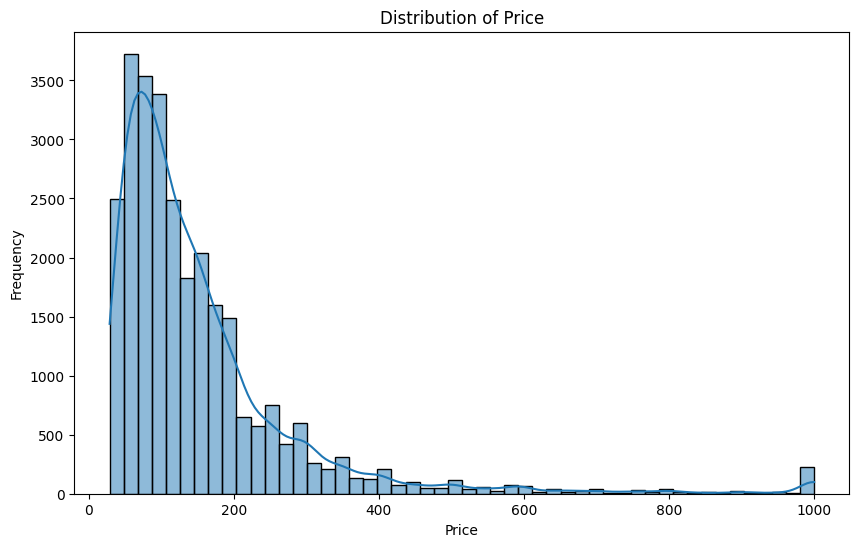

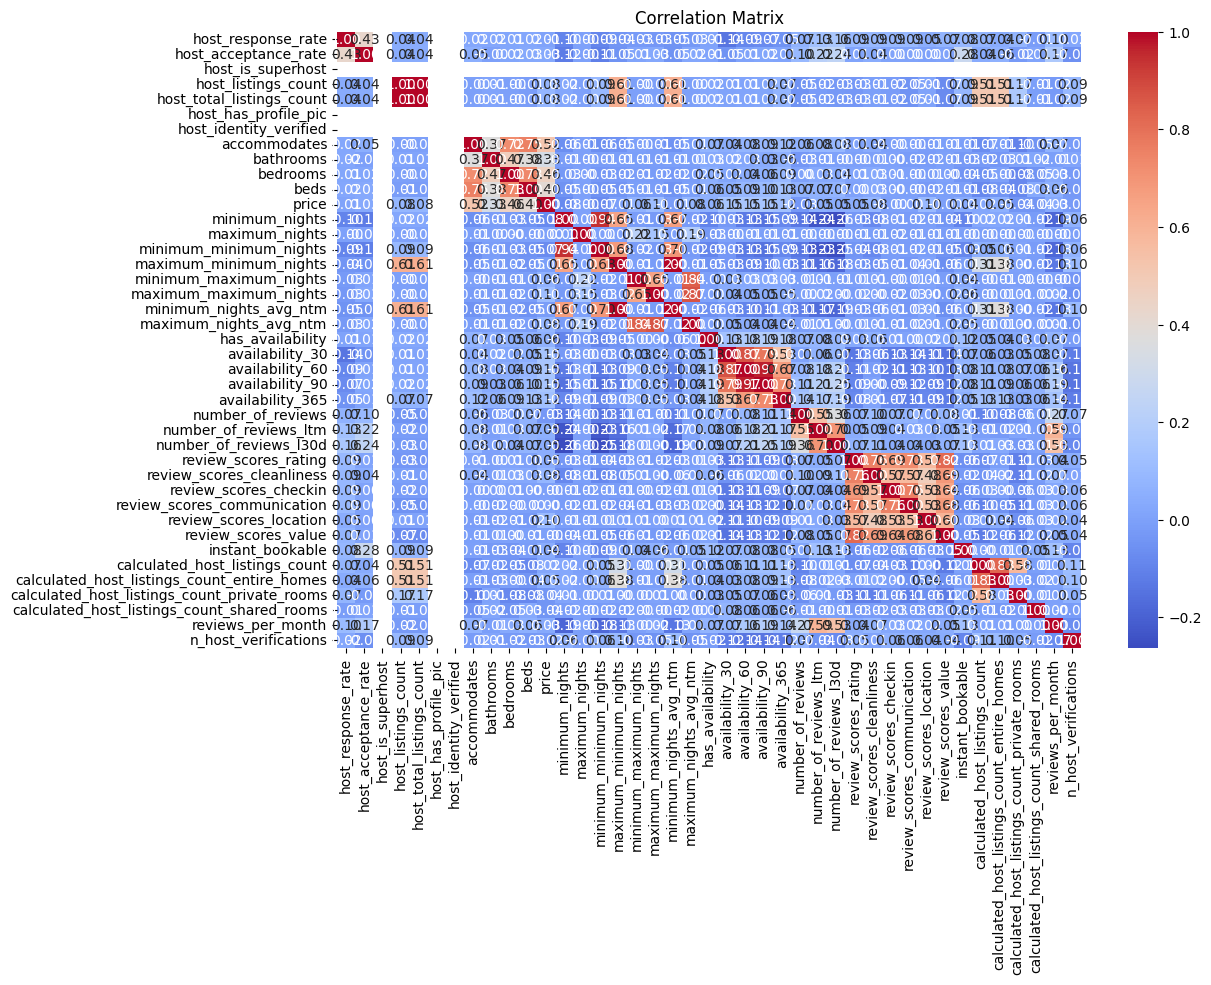

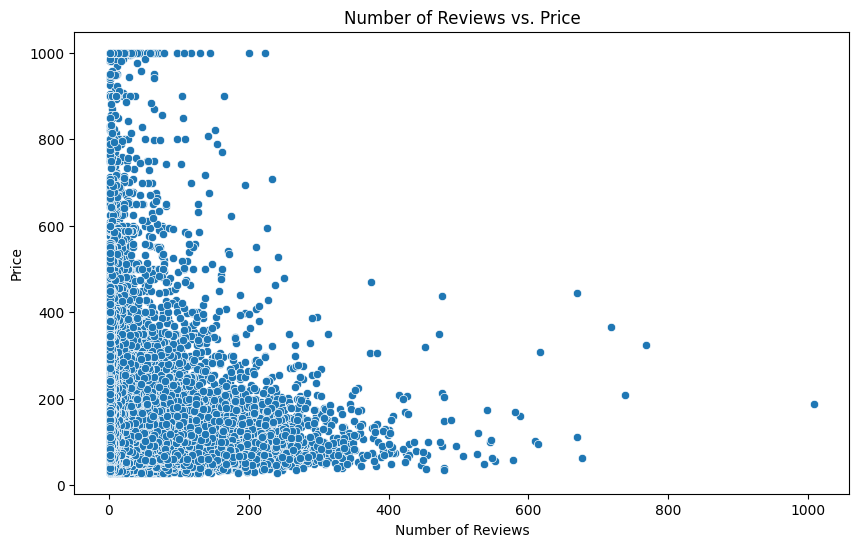

price                                           1.000000
accommodates                                    0.519057
bedrooms                                        0.457171
beds                                            0.400325
bathrooms                                       0.331297
availability_60                                 0.152750
availability_90                                 0.148228
availability_30                                 0.146895
availability_365                                0.123984
maximum_maximum_nights                          0.107901
review_scores_location                          0.096610
maximum_nights_avg_ntm                          0.081589
review_scores_cleanliness                       0.081402
host_total_listings_count                       0.080995
host_listings_count                             0.080995
minimum_maximum_nights                          0.064011
has_availability                                0.062182
number_of_reviews_ltm          

In [7]:


# Inspect the structure of the data
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Verify the data types of all columns
print(df.dtypes)

# Fill missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no missing values
print(df.isnull().sum())

# Display descriptive statistics for numeric columns
print(df.describe())

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between price and other features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


# Analyzing correlation matrix to understand relationships
print(corr_matrix['price'].sort_values(ascending=False))



## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. In my feature selection process, I focused on retaining features that have a direct impact on the pricing of Airbnb listings while removing those that seemed less relevant or would require extensive additional processing. After an initial inspection and analysis, I decided to keep features:    
    'host_is_superhost',  'number_of_reviews',
    'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'instant_bookable',
    'reviews_per_month', 'n_host_verifications'
These features are important because they directly relate to the host’s behavior, listing quality, and overall guest experience, which are crucial factors influencing the price. Although the neighborhood quality may impact prices, I removed the neighborhood_overview feature because it is text-heavy and would require complex Natural Language Processing (NLP) techniques to extract meaningful insights, which is beyond the scope of this initial analysis of a regression model.

2. To clean and transform the data, first, I addressed missing values by filling numerical columns with the mean values of their respective columns, ensuring that no numerical data was lost. For categorical columns, I filled missing values with the mode, which is the most frequent value, to maintain consistency. Next, I employed one-hot encoding for categorical features. This technique converts categorical data into a binary matrix, allowing the model to process these variables effectively. Additionally, I standardized the numerical features using the StandardScaler, which scales the data to have a mean of 0 and a standard deviation of 1. This step is crucial as it ensures that all features contribute equally to the model, preventing any single feature from disproportionately affecting the outcome.

3. For this analysis, I decided to use the Random Forest Regressor as my primary model. The Random Forest Regressor is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control over-fitting. This model is particularly well-suited for this task because it can handle both numerical and categorical data, manage missing values, and capture non-linear relationships between features. Additionally, I considered Linear Regression as a baseline model for comparison. By using these two models, I can compare the performance of a simple linear approach versus a more complex, non-linear method, ensuring that I choose the best model for predicting Airbnb prices.

4. First, I split the data into training and testing sets using an 80-20 split, ensuring that the model is trained on a substantial portion of the data while reserving a separate set for evaluation. During the training phase, I fit the Random Forest Regressor to the training data. After training, I evaluate the model's performance on the test data by making predictions and calculating key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2). These metrics provide insights into the model's accuracy and its ability to explain the variance in the target variable. To further improve the model, I would perform hyperparameter tuning using techniques like grid search or random search, which systematically explore different combinations of parameters to find the optimal settings. Finally, I would cross-validate the model to ensure that it generalizes well to new data, thereby producing a robust and reliable predictive model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

   host_is_superhost  number_of_reviews  review_scores_rating  \
0               True                 48                  4.70   
1               True                409                  4.45   
2               True                  2                  5.00   
3               True                507                  4.21   
4               True                118                  4.91   

   review_scores_cleanliness  review_scores_communication  \
0                       4.62                         4.79   
1                       4.49                         4.80   
2                       5.00                         5.00   
3                       3.73                         4.42   
4                       4.82                         4.95   

   review_scores_location  review_scores_value  instant_bookable  \
0                    4.86                 4.41             False   
1                    4.71                 4.64             False   
2                    4.50             

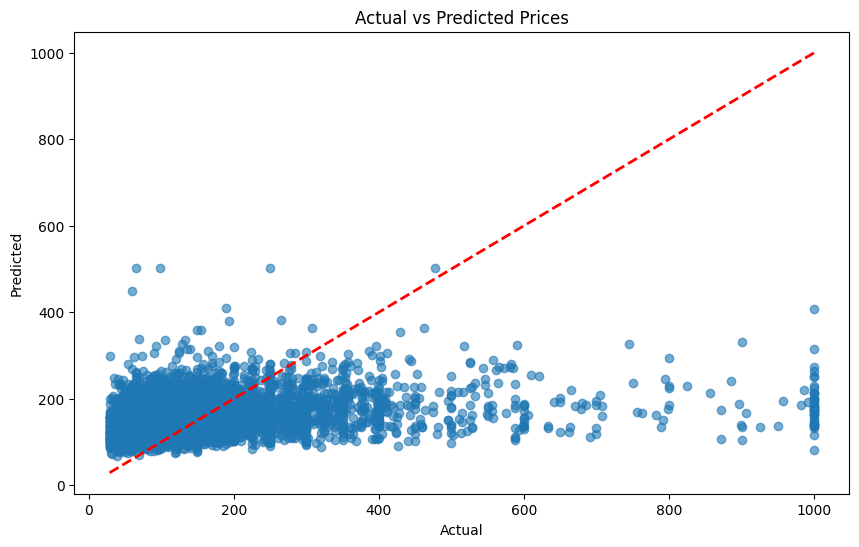

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   9.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   9.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   9.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total 

In [9]:



# List of features to be used
features = [
    'host_is_superhost',  'number_of_reviews',
    'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'instant_bookable',
    'reviews_per_month', 'n_host_verifications'
]

# Select the relevant features and target variable
df_selected = df[features + ['price']]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


# Split the data into features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Initialize the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best parameters
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'MAE with Best Params: {mae_best}')
print(f'MSE with Best Params: {mse_best}')
print(f'R-squared with Best Params: {r2_best}')


# Comparison of initial and optimized model performance
print(f'Initial MAE: {mae}, Optimized MAE: {mae_best}')
print(f'Initial MSE: {mse}, Optimized MSE: {mse_best}')
print(f'Initial R-squared: {r2}, Optimized R-squared: {r2_best}')

# Visualize the distribution of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()
